In [19]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Reading the dataset
import pandas as pd
import numpy as np
BankNoteData=pd.read_csv('C:\\Users\\varsh\\Desktop\\HappyMonkAssignment\\BankNote_Authentication.csv', encoding='latin')
print('Shape before deleting duplicate values:', BankNoteData.shape)

# Removing duplicate rows if any
BankNoteData=BankNoteData.drop_duplicates()
print('Shape After deleting duplicate values:', BankNoteData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
BankNoteData.head(10)

Shape before deleting duplicate values: (1372, 5)
Shape After deleting duplicate values: (1348, 5)


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


<AxesSubplot:xlabel='class'>

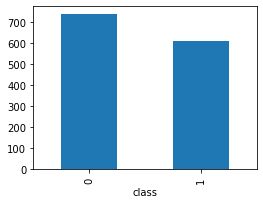

In [21]:
%matplotlib inline
# Creating Bar chart as the Target variable is Categorical
GroupedData=BankNoteData.groupby('class').size()
GroupedData.plot(kind='bar', figsize=(4,3))

In [22]:
# Looking at sample rows in the data
BankNoteData.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
BankNoteData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1348 non-null   float64
 1   skewness  1348 non-null   float64
 2   curtosis  1348 non-null   float64
 3   entropy   1348 non-null   float64
 4   class     1348 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


In [24]:
# Looking at the descriptive statistics of the data
BankNoteData.describe(include='all')

,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [25]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
BankNoteData.nunique()

variance    1338
skewness    1256
curtosis    1270
entropy     1156
class          2
dtype: int64

array([[<AxesSubplot:title={'center':'variance'}>,
        <AxesSubplot:title={'center':'skewness'}>],
       [<AxesSubplot:title={'center':'curtosis'}>,
        <AxesSubplot:title={'center':'entropy'}>]], dtype=object)

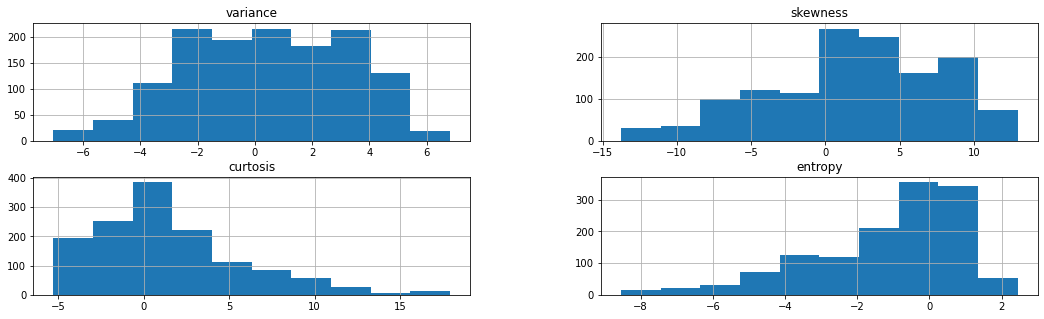

In [26]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
BankNoteData.hist(['variance', 'skewness','curtosis','entropy'], figsize=(18,5))

In [27]:
# Finding how many missing values are there for each column
BankNoteData.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

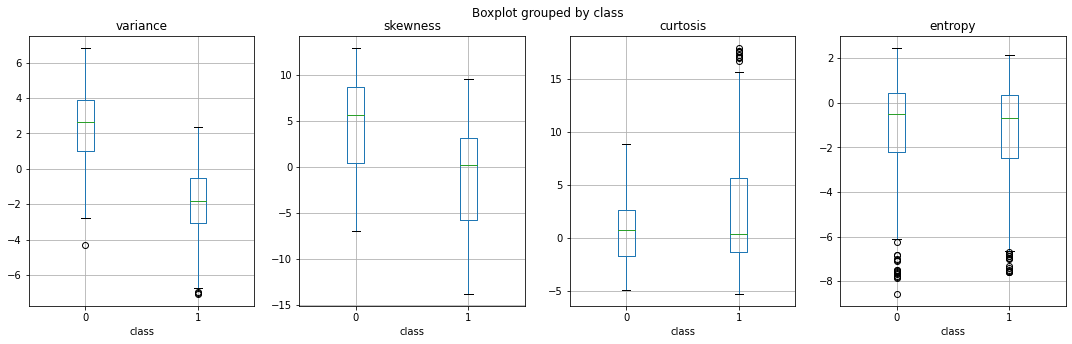

In [28]:
# Box plots for Categorical Target Variable "class" and continuous predictors
ContinuousColsList=['variance', 'skewness','curtosis','entropy']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "class"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    BankNoteData.boxplot(column=PredictorCol, by='class', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [29]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [30]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['variance', 'skewness','curtosis','entropy']
FunctionAnova(inpData=BankNoteData, TargetVariable='class', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

variance is correlated with class | P-Value: 1.550681819687855e-229
skewness is correlated with class | P-Value: 4.002356529374045e-68
curtosis is correlated with class | P-Value: 1.2203203335069328e-08
entropy is NOT correlated with class | P-Value: 0.21249275311703655


['variance', 'skewness', 'curtosis']

In [31]:
SelectedColumns=['variance', 'skewness', 'curtosis']

# Selecting final columns
BankNoteDataForML=BankNoteData[SelectedColumns]
BankNoteDataForML.head()

,variance,skewness,curtosis
0,3.62160,8.6661,-2.8073
1,4.54590,8.1674,-2.4586
2,3.86600,-2.6383,1.9242
3,3.45660,9.5228,-4.0112
4,0.32924,-4.4552,4.5718


In [32]:
# Saving this final data for reference during deployment
BankNoteDataForML.to_pickle('BankNoteDataForML1.pkl')

In [33]:
# Adding Target Variable to the data
BankNoteDataForML['class']=BankNoteData['class']

# Printing sample rows
BankNoteDataForML.head()

,variance,skewness,curtosis,class
0,3.62160,8.6661,-2.8073,0
1,4.54590,8.1674,-2.4586,0
2,3.86600,-2.6383,1.9242,0
3,3.45660,9.5228,-4.0112,0
4,0.32924,-4.4552,4.5718,0


In [34]:
BankNoteDataForML.columns

Index(['variance', 'skewness', 'curtosis', 'class'], dtype='object')

In [35]:
# Separate Target Variable and Predictor Variables
TargetVariable='class'
Predictors=['variance', 'skewness', 'curtosis', 'class']

X=BankNoteDataForML[Predictors].values
y=BankNoteDataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)

In [36]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [46]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['class']
Predictors=['variance', 'skewness', 'curtosis', 'class']

X=BankNoteDataForML[Predictors].values
y=BankNoteDataForML[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(943, 4)
(943, 1)
(405, 4)
(405, 1)


In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print('Classififcation-Report\n',metrics.classification_report(y_test, prediction))
print('Confusion-Matrix\n',metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

Classififcation-Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       185

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

Confusion-Matrix
 [[220   0]
 [  0 185]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


In [39]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

KNeighborsClassifier(n_neighbors=3)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       185

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

[[220   0]
 [  0 185]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


In [40]:
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=20, kernel='rbf', gamma=0.01)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


SVC(C=20, gamma=0.01)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       185

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

[[220   0]
 [  0 185]]
Accuracy of the model on Testing Sample Data: 1.0

Accuracy values for 10-fold Cross Validation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Final Average Accuracy of the model: 1.0


In [41]:
# Standardized predictors
X[0:3]

array([[0.76900389, 0.83964273, 0.10678269, 0.        ],
       [0.83565902, 0.82098209, 0.12180412, 0.        ],
       [0.78662859, 0.41664827, 0.31060805, 0.        ]])

In [42]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[ 3.6216,  8.6661, -2.8073,  0.    ],
       [ 4.5459,  8.1674, -2.4586,  0.    ],
       [ 3.866 , -2.6383,  1.9242,  0.    ]])

In [43]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
# Installing required libraries
#!pip install tensorflow
#!pip install keras

In [75]:
#Classification using Deep Neural Network(ANN)

In [50]:
from keras.models import Sequential
from keras.layers import Dense

In [51]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=4, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=5, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
# fitting the Neural Network on the training data
BankNoteANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1729 - accuracy: 1.0000
Epoch 2/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 1.0000
Epoch 3/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 1.0000
Epoch 4/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 1.0000
Epoch 5/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1351 - accuracy: 1.0000
Epoch 6/10
95/95 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 1.0000
Epoch 7/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 1.0000
Epoch 8/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1135 - accuracy: 1.0000
Epoch 9/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1073 - accuracy: 1.0000
Epoch 10/10
95/95 [==============================] - 0s 3ms/step - loss: 0.1015 - accuracy: 1.0000


In [55]:
# Training data Accuracy of the model is the the accuracy achieved in the last epoch
BankNoteANN_Model.history['accuracy'][-1]

1.0

In [60]:
#Finding the best set of parameters using grid search
def FunctionFindBestParams(X_train, y_train):
    
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50 ,100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10, input_dim=4, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
            classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
            classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            
            BankNoteANN_Model=classifier.fit(X_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber,
                            'batch_size'+str(batch_size_trial)+'-'+'epoch'+str(epochs_trial), Accuracy]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [61]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 1.0
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 1.0
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 1.0
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 1.0
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 1.0
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 1.0
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 1.0
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 1.0
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 1.0
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 1.0
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 1.0
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 1.0
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 1.0
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 1.0
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 1.0
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 1.0


<AxesSubplot:xlabel='Parameters'>

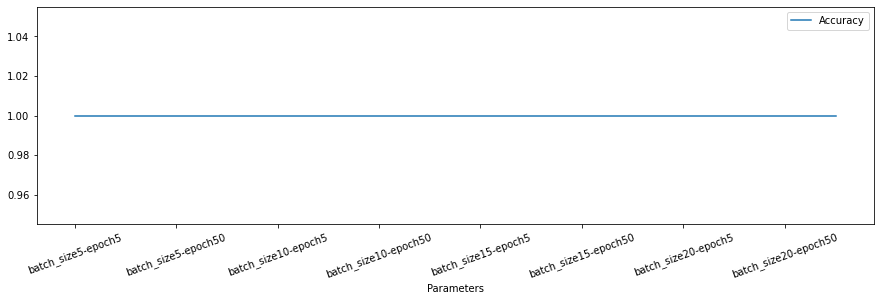

In [62]:
#Plotting the parameters search results
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line', rot=20)

In [63]:
# Printing the best parameter
ResultsData.sort_values(by='Accuracy', ascending=False).head(1)

,TrialNumber,Parameters,Accuracy
0,1,batch_size5-epoch5,1.0


In [65]:
#Training the model using best parameters
classifier.fit(X_train,y_train, batch_size=5 , epochs=30, verbose=1)

Epoch 1/30
189/189 [==============================] - 0s 2ms/step - loss: 3.3825e-05 - accuracy: 1.0000
Epoch 2/30
189/189 [==============================] - 0s 2ms/step - loss: 3.1360e-05 - accuracy: 1.0000
Epoch 3/30
189/189 [==============================] - 0s 2ms/step - loss: 2.9069e-05 - accuracy: 1.0000
Epoch 4/30
189/189 [==============================] - 0s 2ms/step - loss: 2.6945e-05 - accuracy: 1.0000
Epoch 5/30
189/189 [==============================] - 0s 2ms/step - loss: 2.4979e-05 - accuracy: 1.0000
Epoch 6/30
189/189 [==============================] - 0s 2ms/step - loss: 2.3159e-05 - accuracy: 1.0000
Epoch 7/30
189/189 [==============================] - 0s 3ms/step - loss: 2.1468e-05 - accuracy: 1.0000
Epoch 8/30
189/189 [==============================] - 0s 2ms/step - loss: 1.9902e-05 - accuracy: 1.0000
Epoch 9/30
189/189 [==============================] - 0s 3ms/step - loss: 1.8452e-05 - accuracy: 1.0000
Epoch 10/30
189/189 [==============================] - 1s 3ms/st

In [66]:
#Generating the predictors on Testing Data
# Predictions on testing data
Predictions=classifier.predict(X_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['class']=y_test
TestingData['PredictedBankNoteProb']=Predictions

def probThreshold(inpProb):
    if inpProb>0.3:
        return(1)
    else:
        return(0)

TestingData['PredictedBankNote']=TestingData['PredictedBankNoteProb'].apply(probThreshold)
TestingData.head()

,variance,skewness,curtosis,class,PredictedBankNoteProb,PredictedBankNote
0,0.051979,7.052100,-2.05410,0,3.072792e-09,0
1,-0.942550,0.039307,-0.24192,1,9.999920e-01,1
2,-2.826700,-9.040700,9.06940,1,9.999920e-01,1
3,-3.885800,-12.846100,12.79570,1,9.999920e-01,1
4,-1.804600,-6.814100,6.70190,1,9.999920e-01,1


In [68]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
BankNoteDataForML[(BankNoteDataForML['curtosis']==12.79570) & (BankNoteDataForML['class']==1)]

,variance,skewness,curtosis,class
841,-3.8858,-12.8461,12.7957,1
1207,-3.7930,-12.7095,12.7957,1


In [72]:
#Calculating the accuracy on Testing Data
from sklearn import metrics
print('Classification Report\n',metrics.classification_report(TestingData['class'], TestingData['PredictedBankNote']))
print('Confusion Matrix\n',metrics.confusion_matrix(TestingData['class'], TestingData['PredictedBankNote']))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       221
           1       1.00      1.00      1.00       184

    accuracy                           1.00       405
   macro avg       1.00      1.00      1.00       405
weighted avg       1.00      1.00      1.00       405

Confusion Matrix
 [[221   0]
 [  0 184]]
